# DATA SET: bank-full.csv 

Data Description:

The data is related with direct marketing campaigns of a Portuguese
banking institution. The marketing campaigns were based on phone
calls. Often, more than one contact to the same client was required, in
order to access if the product (bank term deposit) would be ('yes') or not
('no') subscribed.

Domain:Banking

Context:

Leveraging customer information is paramount for most businesses. In
the case of a bank, attributes of customers like the ones mentioned
below can be crucial in strategizing a marketing campaign when
launching a new product.

# 1. Import the necessary libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# 2. Read the data as a data frame 

In [2]:
# Read a csv file to a dataframe with custom delimiter
my_data =  pd.read_csv('bank-full.csv', sep=';'  , engine='python')
print('Contents of Dataframe : ')
print(my_data)

Contents of Dataframe : 
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day mont

# 3. Basic EDA

In [3]:
my_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


a.There are 7 Independent variables:

    1.Age(Numeric)
    2.Balance: average yearly balance, in euros (numeric)
    3.Day: last contact day of the month (numeric 1 -31)
    4.Duration: last contact duration, in seconds (numeric).
    5.Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
    6.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    7.previous: number of contacts performed before this campaign and for this client (numeric)

b.There are 8 Ordinal Categorical Variables:

    1.Job : type of job 
    2.Marital : marital status 
    3.Education
    4.Default: has credit in default? (categorical: 'no','yes','unknown')
    5.Housing: has housing loan? (categorical: 'no','yes','unknown')
    6.Loan: has personal loan? (categorical: 'no','yes','unknown')
    7.Contact: contact communication type (categorical:'cellular','telephone')
    8.poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')

c.And the Target variable is binary category variable(desired target):

    Target:has the client subscribed a term deposit? (binary: 'yes', 'no')


# 3.a. Shape of the data 

In [4]:
my_data.shape

(45211, 17)

In [5]:
my_data = my_data.rename(columns={"y": "Target"})

There are 45211 clients.

In [6]:
my_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

# 3.b. Data type of each attribute 

In [7]:
my_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

### Some Attributes are having object data type and some are having integer data type.

### Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 

# 3.c. Checking the presence of missing values 

In [8]:
val=my_data.isnull().values.any()

if val==True:
    print("Missing values present : ", my_data.isnull().values.sum())
    my_data=my_data.dropna()
else:
    print("No missing values present")

No missing values present


## Check for the null values 

In [9]:
#null values
my_data.isnull().values.any()

False

# 3.d. 5 point summary of numerical attributes 

In [10]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [11]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Finding unique data 

In [12]:
my_data.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [13]:
print('Jobs:\n',my_data['job'].unique())
print('Marital:\n',my_data['marital'].unique())
print('Default:\n',my_data['default'].unique())
print('Education:\n',my_data['education'].unique())
print('Housing:\n',my_data['housing'].unique())
print('Loan:\n',my_data['loan'].unique())
print('Contact:\n',my_data['contact'].unique())
print('Month:\n',my_data['month'].unique())
print('Day:\n',my_data['day'].unique())
print('Campaign:\n',my_data['campaign'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:
 ['married' 'single' 'divorced']
Default:
 ['no' 'yes']
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']
Contact:
 ['unknown' 'cellular' 'telephone']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Day:
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Campaign:
 [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


In [14]:
#Find Mean
my_data.mean()

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [15]:
#Find Median
my_data.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [16]:
#Find Standard Deviation
my_data.std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

## Measure of skewness  

In [17]:
my_data.skew(axis = 0, skipna = True) 

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

# Ploting histogram to check that if data columns are normal or almost normal or not

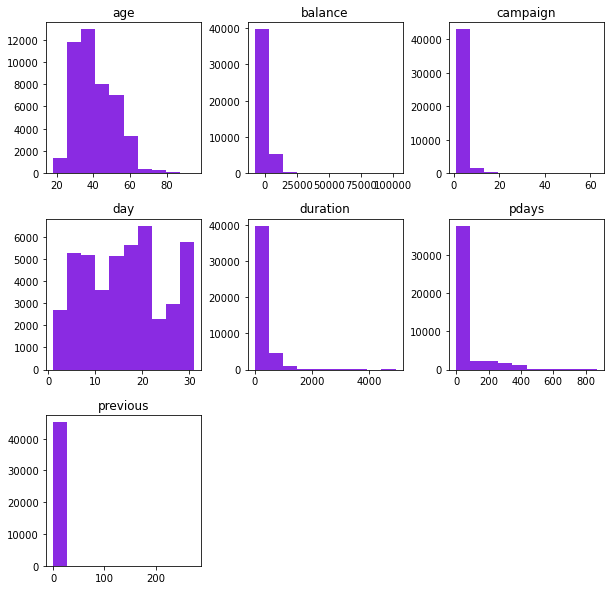

In [18]:
my_data.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

# PairPlot 

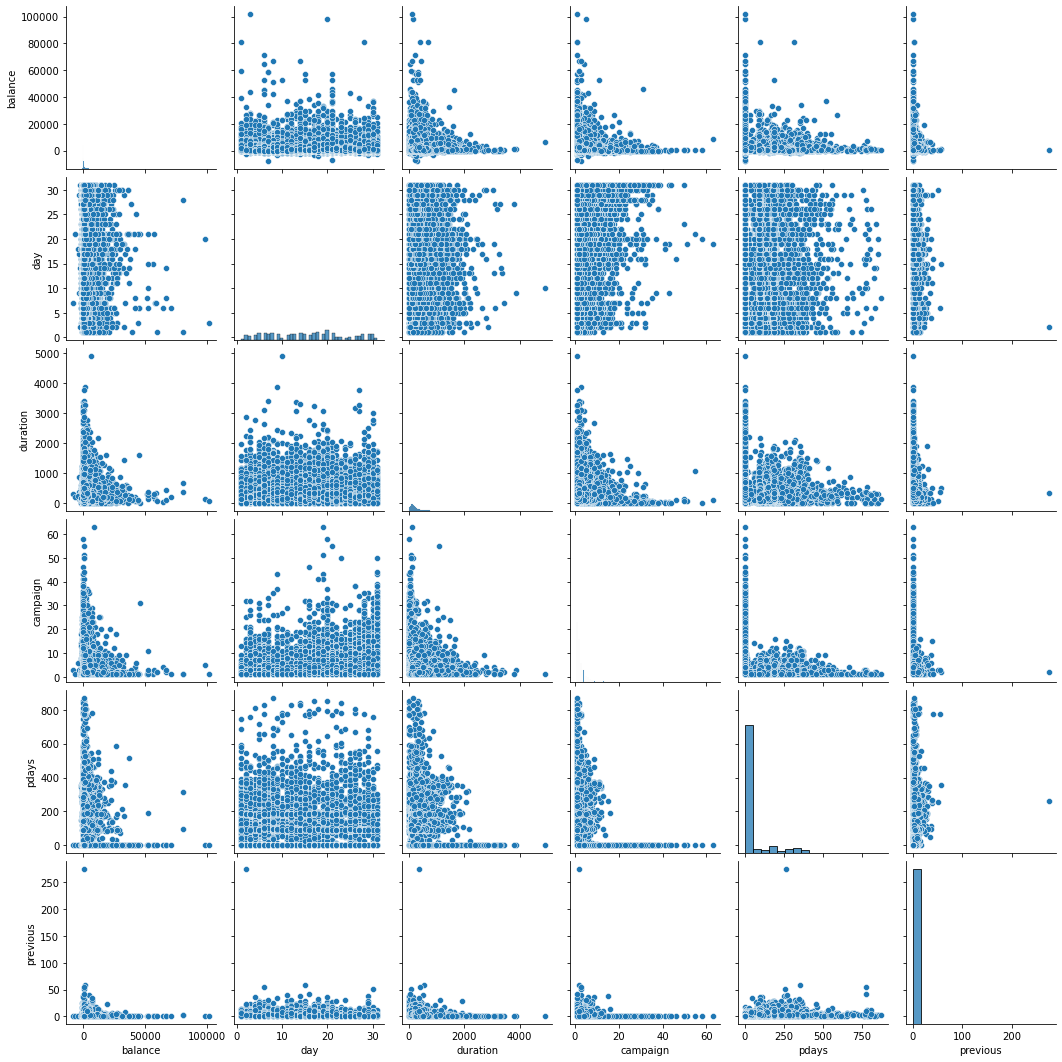

In [19]:
sns.pairplot(my_data.iloc[:,1:])

## Here we can see that distribution for  'Age','Day','Month' and 'Job' is almost normally distributed.

# 3.e. Checking the presence of outliers 

## AGE

In [20]:
print('Min age: ', my_data['age'].max())
print('Max age: ', my_data['age'].min())

Min age:  95
Max age:  18


Text(0.5, 1.0, 'Age Distribution')

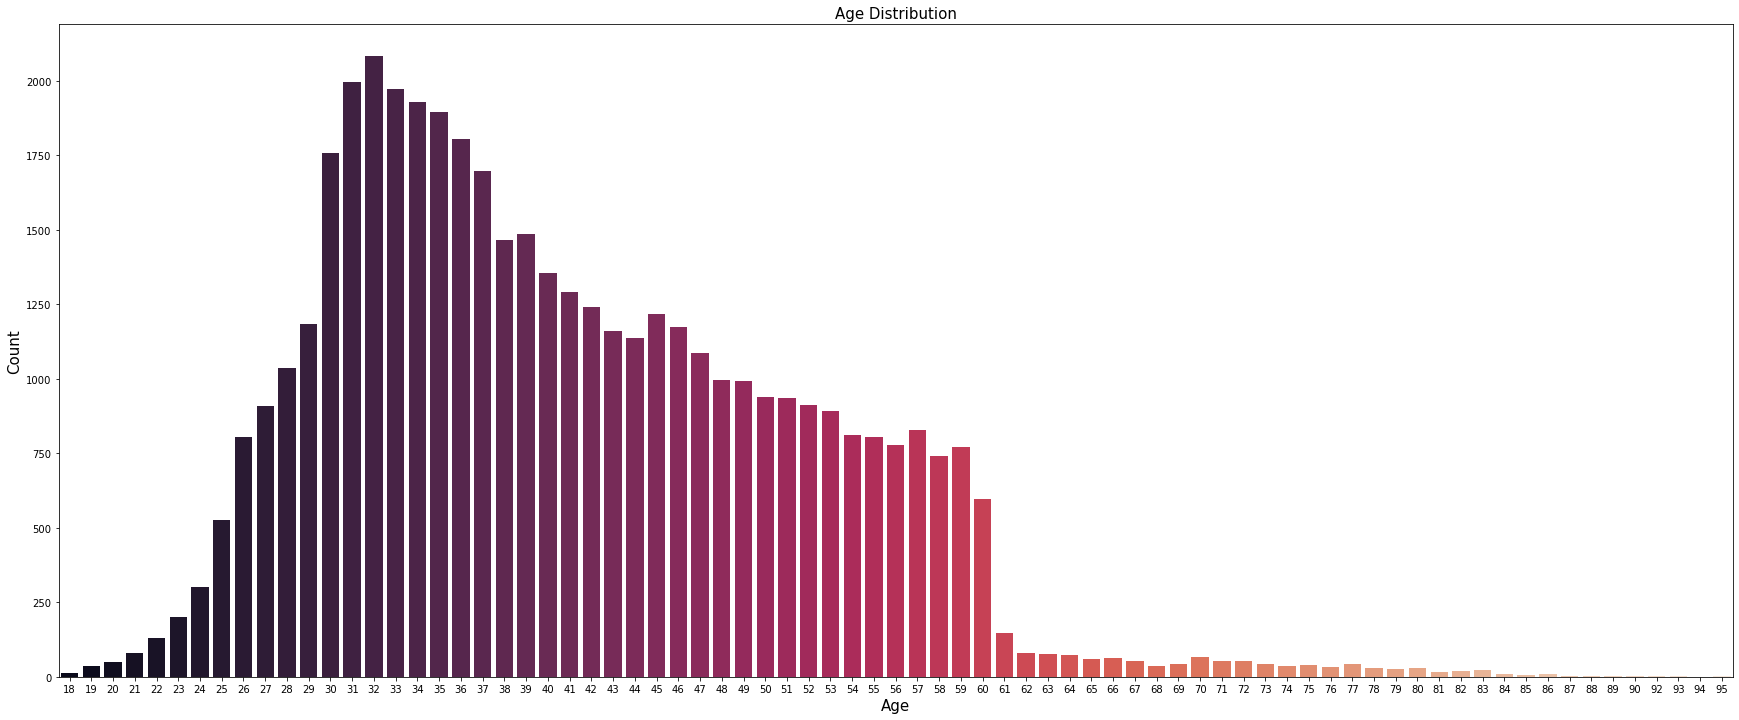

In [21]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'age',  palette="rocket", data = my_data)
plt.xlabel("Age", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Distribution', fontsize=15)

C:\Users\deka\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Age Distribution')

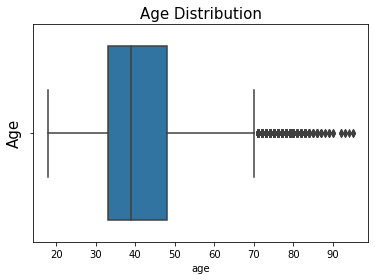

In [22]:
sns.boxplot(x = 'age', data = my_data, orient = 'v')
plt.ylabel("Age", fontsize=15)
plt.title('Age Distribution', fontsize=15)

C:\Users\deka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age x Ocucurence')

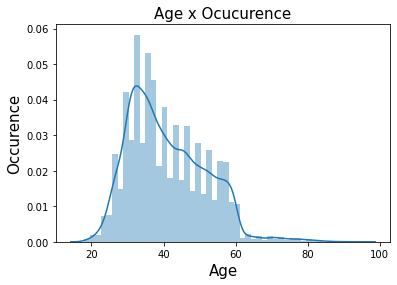

In [23]:
sns.distplot(my_data['age'])
plt.xlabel("Age", fontsize=15)
plt.ylabel('Occurence', fontsize=15)
plt.title('Age x Ocucurence', fontsize=15)

## Calculate the outliers of Age Attribute: 

In [24]:
# Quartiles
print('1º Quartile: ', my_data['age'].quantile(q = 0.25))
print('2º Quartile: ', my_data['age'].quantile(q = 0.50))
print('3º Quartile: ', my_data['age'].quantile(q = 0.75))
print('4º Quartile: ', my_data['age'].quantile(q = 1.00))

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0


In [25]:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', my_data['age'].quantile(q = 0.75) + 
                      1.5*(my_data['age'].quantile(q = 0.75) - my_data['age'].quantile(q = 0.25)), 'are outliers')

Ages above:  70.5 are outliers


In [26]:
print('Numerber of outliers: ', my_data[my_data['age'] > 70.5]['age'].count())
print('Number of clients: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['age'] > 70.5]['age'].count()*100/len(my_data),2), '%')

Numerber of outliers:  487
Number of clients:  45211
Outliers are: 1.08 %


## Just looking at the graphs we cannot conclude if age have a high effect to our Target variable.
## Here we can see the percentage of the outliers is less, so we can  fit the model with and without them.


## Job

Text(0.5, 1.0, 'Job Distribution')

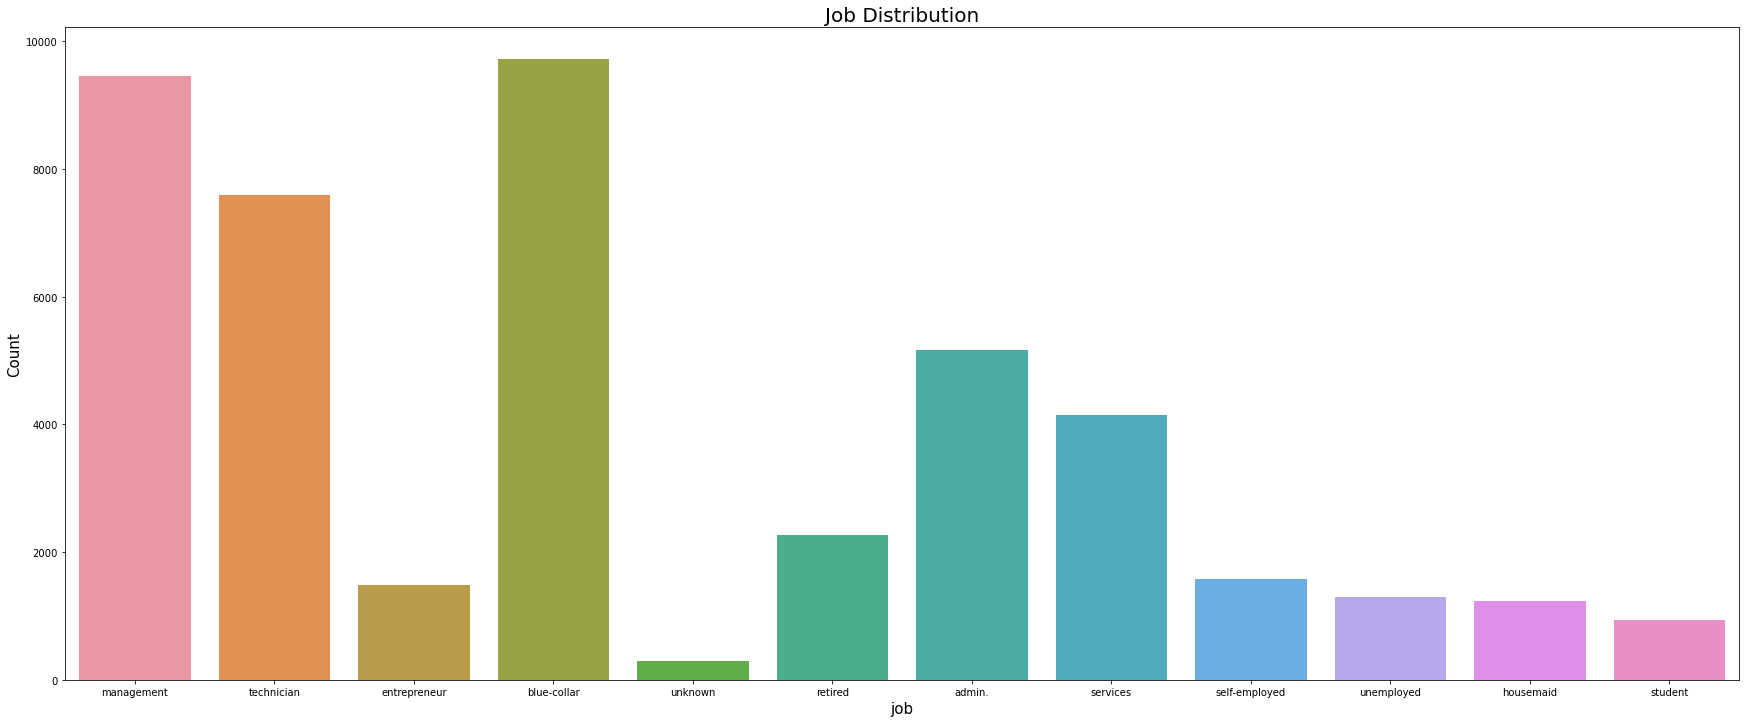

In [27]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data = my_data)
plt.xlabel("job", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Distribution', fontsize=20)

###  The count of 'Blue-collar' is higher than the other .Also the count for 'Management' is noticeable.

##  Marital

Text(0.5, 1.0, 'Marital Distribution')

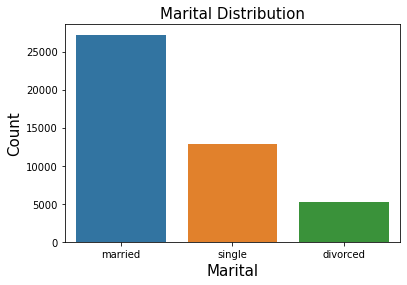

In [28]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'marital',data = my_data)
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

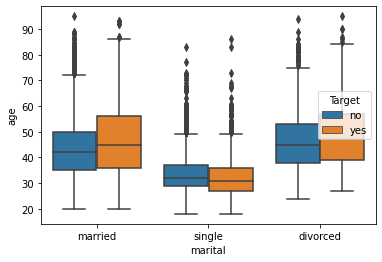

In [29]:
sns.boxplot(x='marital',y='age',hue='Target',data=my_data)

## Here we can see the Mareied people are more subscribing a term deposit. But here is also 50 percente chances to suscribe by clients as we can see in graphs. 

## Married people are more ,we can see here clearly. 

## Education

Text(0.5, 1.0, 'Education Distribution')

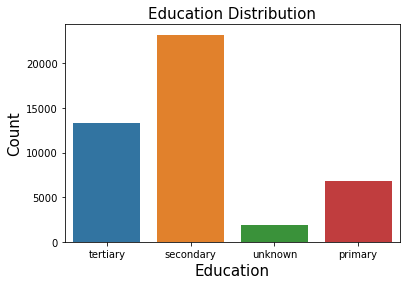

In [30]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'education',data = my_data)
plt.xlabel("Education", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Distribution', fontsize=15)

## The clients having secondary education are more .And the clients having unknown eduction are less .

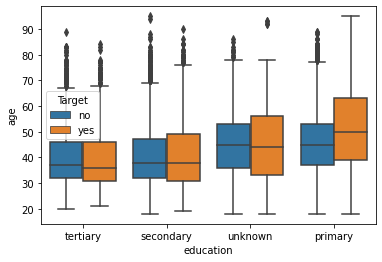

In [31]:
sns.boxplot(x='education',y='age',hue='Target',data=my_data)

## There are outliers present in each education criteria . But the clients having primary education are more who have subscribed a term deposit.

## Default 

Text(0.5, 1.0, 'Default Distribution')

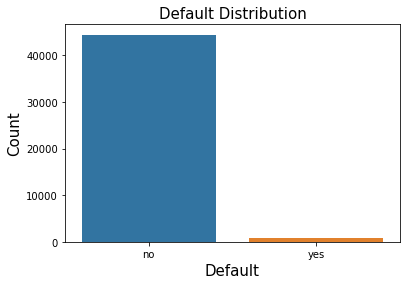

In [32]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'default',data = my_data)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

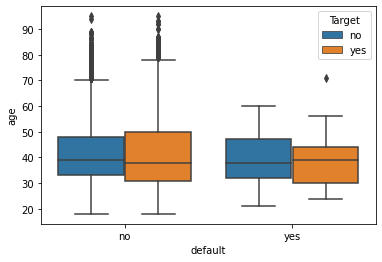

In [33]:
sns.boxplot(x='default',y='age',hue='Target',data=my_data)

In [34]:
print('Default:\n No credit in default:'     , my_data[my_data['default'] == 'no']     ['age'].count(),
              '\n Yes to credit in default:' , my_data[my_data['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 44396 
 Yes to credit in default: 815


## The clients having bydefault credit are less than those who don't have bydefault credit. 

## Housing

Text(0.5, 1.0, 'Housing Distribution')

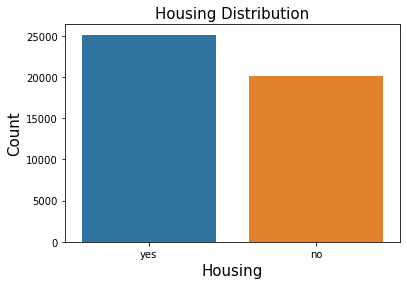

In [35]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'housing',data = my_data)
plt.xlabel("Housing", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Distribution', fontsize=15)

In [36]:
print('Housing:\n No Housing:'     , my_data[my_data['housing'] == 'no']     ['age'].count(),
              '\n Yes Housing:' , my_data[my_data['housing'] == 'yes']    ['age'].count())

Housing:
 No Housing: 20081 
 Yes Housing: 25130


## The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.

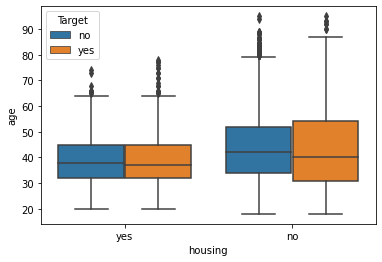

In [37]:
sns.boxplot(x='housing',y='age',hue='Target',data=my_data)

## The clients who don't have taken housing loan have subscribed a term deposite with more than 50% chances.

## Loan 

Text(0.5, 1.0, 'Loan Distribution')

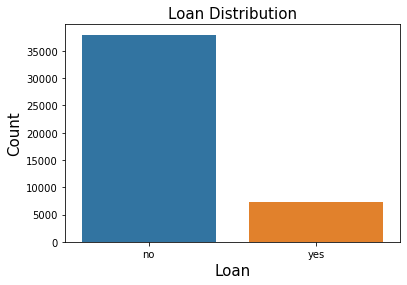

In [38]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'loan',data = my_data)
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)

In [39]:
print('Loan:\n No Personal loan:'     , my_data[my_data['loan'] == 'no']     ['age'].count(),
              '\n Yes Personal Loan:' , my_data[my_data['loan'] == 'yes']    ['age'].count())

Loan:
 No Personal loan: 37967 
 Yes Personal Loan: 7244


## The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count 

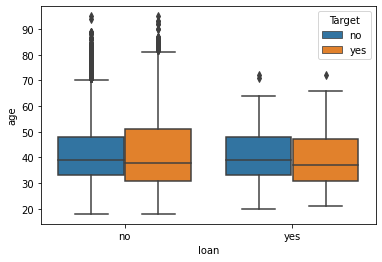

In [40]:
sns.boxplot(x='loan',y='age',hue='Target',data=my_data)

## Contact 

Text(0.5, 1.0, 'Contact Distribution')

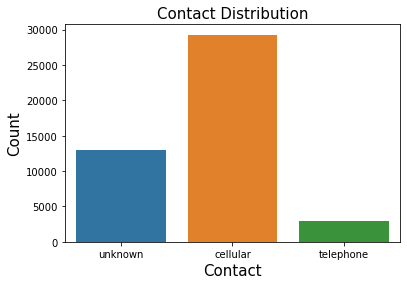

In [41]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'contact',data = my_data)
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

In [42]:
print('Contact:\n Unknown Contact:'     , my_data[my_data['contact'] == 'unknown']     ['age'].count(),
              '\n Cellular Contact:'   , my_data[my_data['contact'] == 'cellular']    ['age'].count(),
              '\n Telephone Contact:'  , my_data[my_data['contact'] == 'telephone']   ['age'].count())

Contact:
 Unknown Contact: 13020 
 Cellular Contact: 29285 
 Telephone Contact: 2906


## The count of a clients who can be contacted by Cellular is high that the others. 

## Month

Text(0.5, 1.0, 'Monthly Distribution')

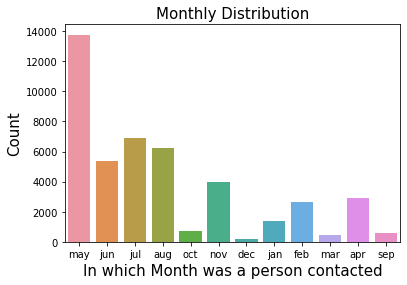

In [43]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'month',data = my_data)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

## The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset. 

## Day 

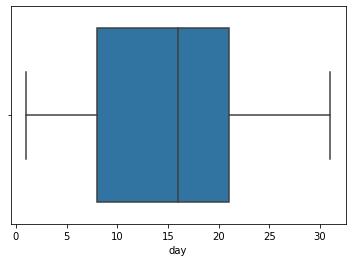

In [44]:
sns.boxplot(x=my_data["day"])

## Most of the contacts are done in between 8th-21st day of the particular month.And Also there is no outlier present. 

## Duration of a call 

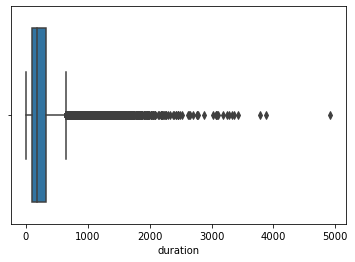

In [45]:
sns.boxplot(x=my_data["duration"])

C:\Users\deka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration distribution')

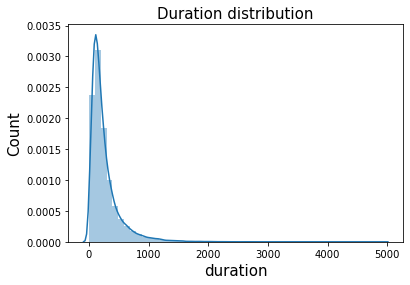

In [46]:
sns.distplot(my_data['duration'])
plt.xlabel("duration", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Duration distribution', fontsize=15)

### Calculate the outliers of Duration of last contact:

In [47]:
# Quartiles
print('1º Quartile: ', my_data['duration'].quantile(q = 0.25))
print('2º Quartile: ', my_data['duration'].quantile(q = 0.50))
print('3º Quartile: ', my_data['duration'].quantile(q = 0.75))
print('4º Quartile: ', my_data['duration'].quantile(q = 1.00))

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0


In [48]:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration above: ', my_data['duration'].quantile(q = 0.75) + 
                      1.5*(my_data['duration'].quantile(q = 0.75) - my_data['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  643.0 are outliers


In [49]:
print('Numerber of outliers: ', my_data[my_data['duration'] > 643.0]['duration'].count())
print('Number of clients: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['duration'] > 643.0]['duration'].count()*100/len(my_data),2), '%')

Numerber of outliers:  3235
Number of clients:  45211
Outliers are: 7.16 %


## Just looking at the graphs we cannot conclude if duration have a high effect to our Target variable.
## Here we can see the percentage of the outliers is less.But count is high means 643 count is not less I think so.


In [50]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
my_data[(my_data['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [51]:
my_data[my_data['duration'] == 0]['duration'].count()

3

##  Campaign

Text(0.5, 1.0, 'Campaign Distribution')

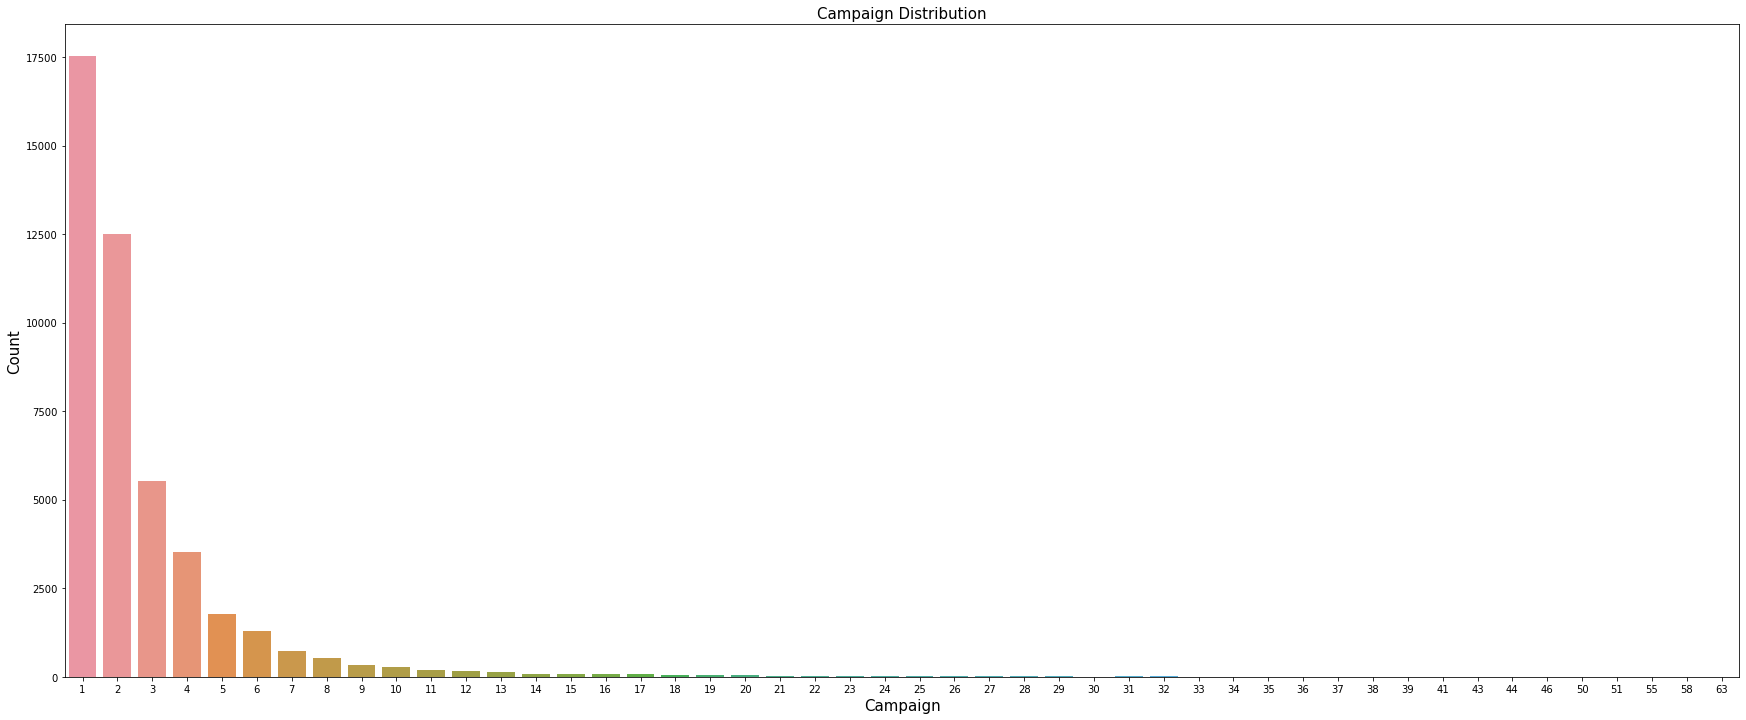

In [52]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'campaign', data = my_data)
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

C:\Users\deka\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Campaign Distribution')

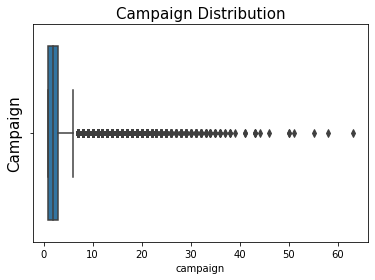

In [53]:
sns.boxplot(x = 'campaign', data = my_data, orient = 'v')
plt.ylabel("Campaign", fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

C:\Users\deka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Campaign distribution')

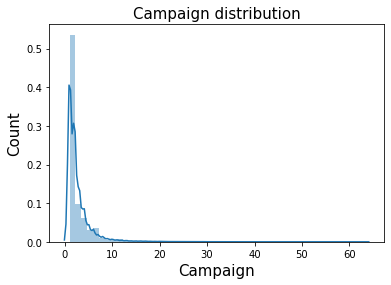

In [54]:
sns.distplot(my_data['campaign'])
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign distribution', fontsize=15)

### Calculate the outliers for Campaign attribute: 

In [55]:
# Quartiles
print('1º Quartile: ', my_data['campaign'].quantile(q = 0.25))
print('2º Quartile: ', my_data['campaign'].quantile(q = 0.50))
print('3º Quartile: ', my_data['campaign'].quantile(q = 0.75))
print('4º Quartile: ', my_data['campaign'].quantile(q = 1.00))

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  63.0


In [56]:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Campaign above: ', my_data['campaign'].quantile(q = 0.75) + 
                      1.5*(my_data['campaign'].quantile(q = 0.75) - my_data['campaign'].quantile(q = 0.25)), 'are outliers')

Campaign above:  6.0 are outliers


In [57]:
print('Numerber of outliers: ', my_data[my_data['campaign'] > 6.0]['campaign'].count())
print('Number of clients: ', len(my_data))
#Outliers in %
print('Outliers are:', round(my_data[my_data['campaign'] > 6.0]['campaign'].count()*100/len(my_data),2), '%')

Numerber of outliers:  3064
Number of clients:  45211
Outliers are: 6.78 %


## The percentage of presence of outlier is less as we can see.So we can fit the model with or without this attribute. 

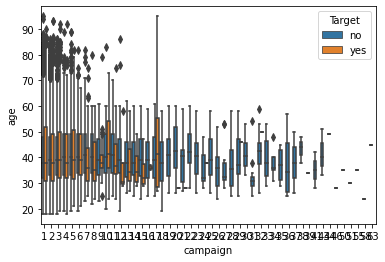

In [58]:
sns.boxplot(x='campaign',y='age',hue='Target',data=my_data)

## pdays

C:\Users\deka\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'pdays Distribution')

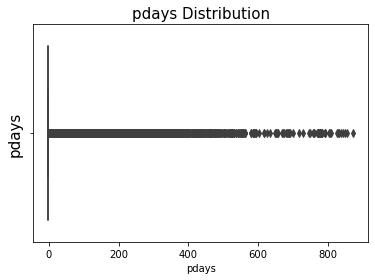

In [59]:
sns.boxplot(x = 'pdays', data = my_data, orient = 'v')
plt.ylabel("pdays", fontsize=15)
plt.title('pdays Distribution', fontsize=15)

## Previous 

C:\Users\deka\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Previous')

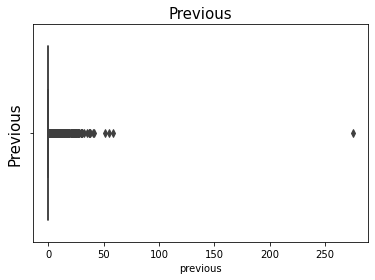

In [60]:
sns.boxplot(x = 'previous', data = my_data, orient = 'v')
plt.ylabel("Previous", fontsize=15)
plt.title('Previous', fontsize=15)

## poutcome: 

Text(0.5, 1.0, 'Poutcome distribution')

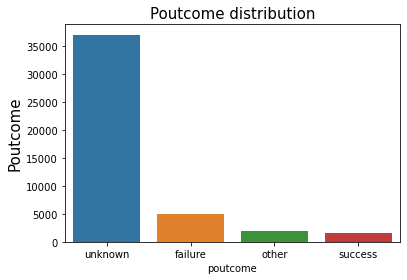

In [61]:
sns.countplot(x = 'poutcome', data = my_data, orient = 'v')
plt.ylabel("Poutcome", fontsize=15)
plt.title('Poutcome distribution', fontsize=15)

In [62]:
print('poutcome:\n Unknown poutcome:'     , my_data[my_data['poutcome'] == 'unknown']   ['age'].count(),
              '\n Failure in  poutcome:'  , my_data[my_data['poutcome'] == 'failure']   ['age'].count(),
              '\n Other poutcome:'        , my_data[my_data['poutcome'] == 'other']     ['age'].count(),
              '\n Success in poutcome:'   , my_data[my_data['poutcome'] == 'success']   ['age'].count())

poutcome:
 Unknown poutcome: 36959 
 Failure in  poutcome: 4901 
 Other poutcome: 1840 
 Success in poutcome: 1511


## The success of the previous marketing campaign is not noticeable as we can see in graph.But still I am not sure as there are so many unknown options present. 

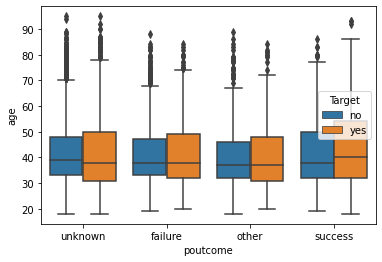

In [63]:
sns.boxplot(x='poutcome',y='age',hue='Target',data=my_data)

## Target column 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D23DFC9CD0>,
      dtype=object)

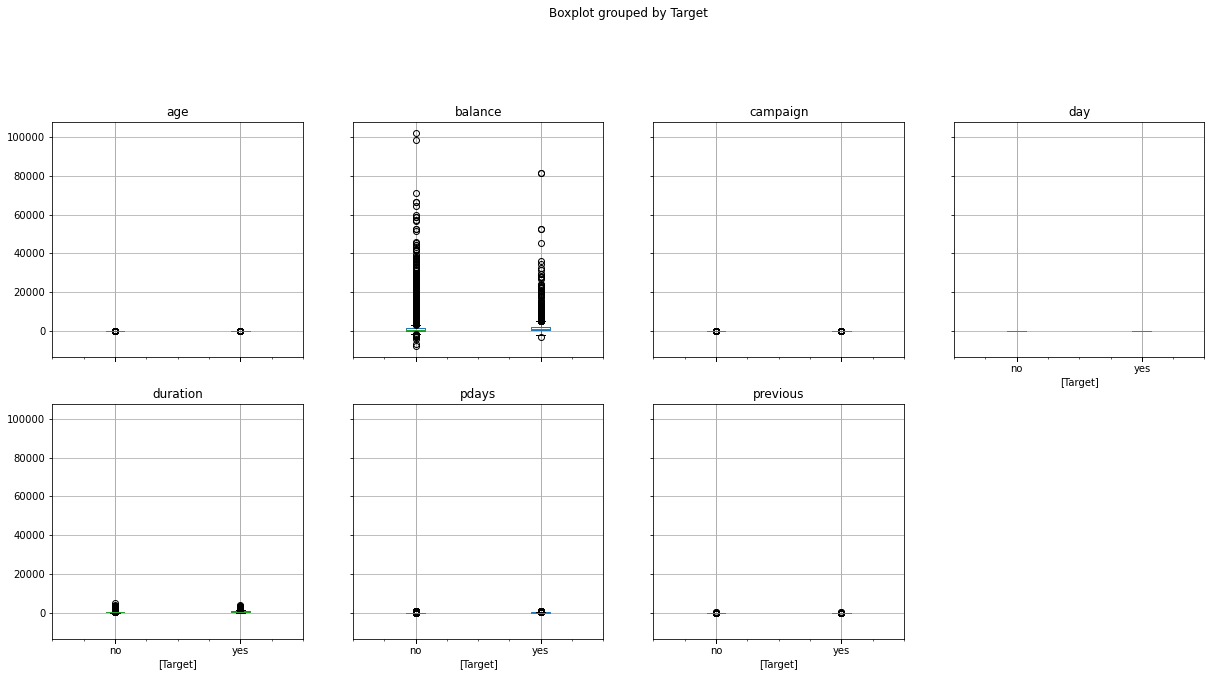

In [64]:
my_data.boxplot(by = 'Target',  layout=(4,4), figsize=(20, 20))

Text(0.5, 1.0, 'Target distribution')

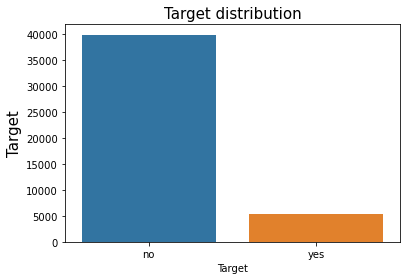

In [65]:
sns.countplot(x = 'Target', data = my_data, orient = 'v')
plt.ylabel("Target", fontsize=15)
plt.title('Target distribution', fontsize=15)

In [66]:
#Let us look at the target column which is "Target"(yes/no).
my_data.groupby(["Target"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


## Calculate the correlation matrix 

In [67]:
cor=my_data.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### Heatmap 

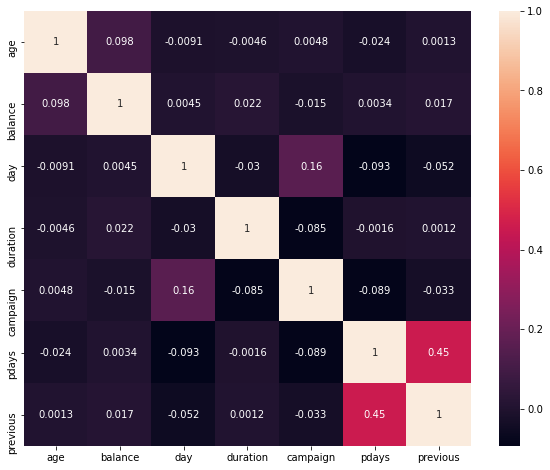

In [68]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

# 11.Conclusion from EDA: 

### 1.The ages are not that much important and dont make sense relate with other variables will not tell any insight.Just looking at the graphs we cannot conclude if age have a high effect to our Target variable.
### 2.Here we can see the percentage of the outliers for 'Age' is less, so we can fit the model with and without them.
### 3.If we consider the Job attribute we can see the count of 'Blue-collar' is higher than the other .Also the count for 'Management' is noticeable.
### 4.Married people are more ,we can see in graph clearly.
### 5.The clients having secondary education are more .And the clients having unknown eduction are less .
### 6.The clients having bydefault credit are less than those who don't have bydefault credit.
### 7.The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.
### 8.The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count.
### 9.The count of a clients who can be contacted by Cellular is high that the others.
### 10.The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.
### 11.Most of the contacts are done in between 8th-21st day of the particular month.And Also there is no outlier present.
### 12.Just looking at the graphs we cannot conclude if duration have a high effect to our Target variable.Here we can see the percentage of the outliers is less.But count is high means 643 count is not less I think so.
### 13.The percentage of presence of outlier is less as we can see.So we can fit the model with or without this attribute.
### 14.The success of the previous marketing campaign is not noticeable as we can see in graph.But still I am not sure as there are so many unknown options present.
### 15.I think for the Jobs, Marital and Education  the best analisys is just the count of each variable, if we related with the other ones its is not conclusive.
### 16.The Mareied people are more subscribing a term deposit. But here is also 50 percente chances to suscribe by clients as we can see in graphs.
### 17.here are outliers present in each education criteria . But the clients having primary education are more who have subscribed a term deposit.
### 18.The clients who don't have taken housing loan have subscribed a term deposite with more than 50% chances.

# 4. Prepare the data to train a model – check if data types areappropriate, get rid of the missing values etc 

### Converting catagorical attributes to continuous due the feature scaling will be applied later. 

In [69]:
# Label encoder order in alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
my_data['job']      = labelencoder_X.fit_transform(my_data['job']) 
my_data['marital']  = labelencoder_X.fit_transform(my_data['marital']) 
my_data['education']= labelencoder_X.fit_transform(my_data['education']) 
my_data['default']  = labelencoder_X.fit_transform(my_data['default']) 
my_data['housing']  = labelencoder_X.fit_transform(my_data['housing']) 
my_data['loan']     = labelencoder_X.fit_transform(my_data['loan']) 

my_data['contact']     = labelencoder_X.fit_transform(my_data['contact']) 
my_data['month']       = labelencoder_X.fit_transform(my_data['month']) 

In [70]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(my_data);

In [71]:
my_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [72]:
print(my_data.shape)
my_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [73]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(my_data);

In [74]:
my_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,unknown,no


In [75]:
my_data.loc[(my_data['pdays'] == 999), 'pdays'] = 1
my_data.loc[(my_data['pdays'] > 0) & (my_data['pdays'] <= 10), 'pdays'] = 2
my_data.loc[(my_data['pdays'] > 10) & (my_data['pdays'] <= 20), 'pdays'] = 3
my_data.loc[(my_data['pdays'] > 20) & (my_data['pdays'] != 999), 'pdays'] = 4 
my_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,unknown,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,unknown,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,unknown,no


In [76]:
my_data['poutcome'].replace(['unknown', 'failure','other', 'success'], [1,2,3,4], inplace  = True)

In [77]:
print(my_data.shape)
my_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1,no


In [78]:
Final_data=my_data
print(Final_data.shape)
Final_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1,no


# 5. Train a few standard classification algorithms, note and comment on their performances along different metrics. 

In [79]:
Final_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1,no
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,no
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1,no


# 5.A.Applying  the NB model and print the accuracy of NB model. 

In [80]:
#from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [81]:
X = Final_data.values[:,0:15]  ## Features
Y = Final_data.values[:,16]  ## Target.values[:,10]  ## Target

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [83]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [84]:
Y_pred = clf.predict(X_test)

In [85]:
NB=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',NB)

Accuracy_score: 0.848938366263639


In [86]:
print('Confusion_matrix of NB:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix of NB:
[[10703  1327]
 [  722   812]]


# 5.B.Applying  the KNN model and print the accuracy of KNN model. 

In [87]:
final_data = Final_data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
final_data.shape

(45211, 15)

In [88]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [89]:
X_std = pd.DataFrame(StandardScaler().fit_transform(final_data))
X_std.columns = final_data.columns

In [90]:
#split the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(my_data.iloc[:,1:16]) 
y = np.array(my_data['Target'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [91]:
print(X_train.shape)
print(y_train.shape)

(36168, 15)
(36168,)


In [92]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

#Neighbors
neighbors = np.arange(0,25)

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    


0.8372221607873493
0.8823399314386818
0.8709499060046445
0.8825610969810903
0.8806811898706182
0.8838880902355413
0.8831140108371116
0.8839986730067455
0.8833351763795201
0.8843304213203583
0.8841092557779497
0.8839986730067455
0.8836669246931328
0.8843304213203583
0.8841092557779497
0.8842198385491541
0.8839986730067455
0.8841092557779497
0.8841092557779497
0.8841092557779497
0.8839986730067455
0.8843304213203583
0.8843304213203583
0.8843304213203583
0.8841092557779497


In [93]:
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [94]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 23


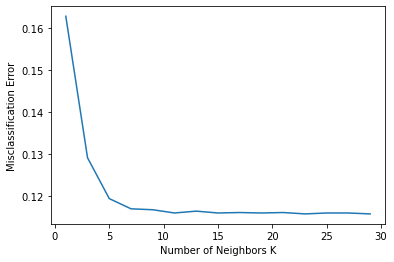

In [95]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [96]:
#Use k=23 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 23)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
KNN=accuracy_score(y_test, y_pred)   #Accuracy of KNN model
print('Accuracy_score:',KNN)    

Accuracy_score: 0.8843304213203583


In [97]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion_matrix:
[[7997    0]
 [1046    0]]


# 5.C.Applying Logistic Regression Model and Print accuracy and confusion matrix of Logistic Regression. 

In [98]:
array = my_data.values
X = array[:,0:16] # select all rows and first 16 columns which are the attributes
Y = array[:,16]   # select all rows and the 17th column which is the classification "yes", "no"
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

In [99]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
LR = model.score(X_test, y_test)
print('Accuracy:',LR)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=LR  # Accuracy of Logistic regression model

Accuracy: 0.8824093187850192
confusion_matrix:
[[11754   278]
 [ 1317   215]]


C:\Users\deka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 6. Build the ensemble models and compare the results with the base models. 

# A.Decision Tree

In [100]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in my_data.columns: # Loop through all columns in the dataframe
    if my_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        my_data[feature] = pd.Categorical(my_data[feature]).codes # Replace strings with an integer

In [101]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  Target     45211 non-null  int8 
dtypes: int32(8), int64(8), int8(1)
memory usage: 4.2 MB


In [102]:
train_char_label = ['No', 'Yes']

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [104]:
# splitting data into training and test set for independent attributes in the ratio of 70:30 
n=my_data['Target'].count()
train_set = my_data.head(int(round(n*0.7))) # Up to the last initial training set row
test_set = my_data.tail(int(round(n*0.3))) # Past the last initial training set row

# capture the target column ("Target") into separate vectors for training set and test set
train_labels = train_set.pop("Target")
test_labels = test_set.pop("Target")

In [105]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [106]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy')

In [107]:
#Print the accuracy of the model & print the confusion matrix
dt_model.score(test_set , test_labels)
test_pred = dt_model.predict(test_set)

In [108]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))#Print the feature importance of the decision model

                Imp
age        0.030865
job        0.057281
marital    0.024595
education  0.032286
default    0.002707
balance    0.182550
housing    0.011583
loan       0.011758
contact    0.023840
day        0.116655
month      0.112575
duration   0.324298
campaign   0.058012
pdays      0.002429
previous   0.004467
poutcome   0.004098


In [109]:
y_predict = dt_model.predict(test_set)

In [110]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

1.0
0.6044385460443854


In [111]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[7008 3106]
 [2259 1190]]


# I think the data is overfitted.

#  Regularising the Decision Tree

In [112]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [113]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))


                Imp
age        0.030865
job        0.057281
marital    0.024595
education  0.032286
default    0.002707
balance    0.182550
housing    0.011583
loan       0.011758
contact    0.023840
day        0.116655
month      0.112575
duration   0.324298
campaign   0.058012
pdays      0.002429
previous   0.004467
poutcome   0.004098


In [114]:
y_predict = reg_dt_model.predict(test_set)

In [115]:
DTC=reg_dt_model.score(test_set , test_labels)
print(DTC)

0.7636216176362162


In [116]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[9587  527]
 [2679  770]]


# B.Apply Bagging Classifier Algorithm and print the accuracy. 

In [117]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(train_set, train_labels)


In [118]:
y_predict = bgcl.predict(test_set)

BGC=bgcl.score(test_set , test_labels)
print(BGC)

print(metrics.confusion_matrix(test_labels, y_predict))

0.5939688859396889
[[7061 3053]
 [2454  995]]


# C. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy. 

In [119]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(train_set, train_labels)


In [120]:
y_predict = abcl.predict(test_set)

ADE=abcl.score(test_set , test_labels)
print(ADE)

print(metrics.confusion_matrix(test_labels, y_predict))

0.6041436260414362
[[7030 3084]
 [2285 1164]]


# D.Apply GradientBoost Classifier Algorithm for the same data and print the accuracy.

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(train_set, train_labels)

In [122]:
y_predict = gbcl.predict(test_set)
GBC=gbcl.score(test_set , test_labels)
print(GBC)
print(metrics.confusion_matrix(test_labels, y_predict))

0.7546265575462656
[[9457  657]
 [2671  778]]


# E. Apply the Random forest model and print the accuracy of Random forest Model

## Note: Random forest can be used only with Decision trees. 

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

In [124]:
y_predict = rfcl.predict(test_set)
RFC=rfcl.score(test_set , test_labels)
print(RFC)
print(metrics.confusion_matrix(test_labels, y_predict))

0.751529897515299
[[9666  448]
 [2922  527]]


# 7. Compare performances of all the models

In [125]:
models = pd.DataFrame({
                'Models': [ 'Gausian NB','K-Near Neighbors','Logistic Model', 'Decision Tree Classifier',
                            'Bagging Classifier ', 'Adaboost Ensemble ','GradientBoost Classifier ', 'Random Forest Classifier'],
                'Score':  [NB, KNN, LR, DTC, BGC, ADE, GBC, RFC]})

models.sort_values(by='Score', ascending=False)

,Models,Score
1,K-Near Neighbors,0.884330
2,Logistic Model,0.882409
0,Gausian NB,0.848938
3,Decision Tree Classifier,0.763622
6,GradientBoost Classifier,0.754627
7,Random Forest Classifier,0.751530
5,Adaboost Ensemble,0.604144
4,Bagging Classifier,0.593969


# Conclusions : 

## 1.The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
## 2.A bank wants to know whether clients will subscribe a term deposit or not; so that they need information about the correlation between the variables given in the dataset.
## 3.Here I used 7 classification models to study.
## 4.From the accuracy scores , it seems like "Logistic Regression" algorithm have the highest accuracy and stability.
## 5.But we can use "KNN" also as it has a good accuracy and stability as well than other models.